In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv('/content/MentalHealthPrediction.csv', on_bad_lines='skip')
df

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140695,140695,Vidya,Female,18.0,Ahmedabad,Working Professional,NaN,NaN,5.0,NaN,NaN,4.0,5-6 hours,Unhealthy,Class 12,No,2.0,4.0,Yes,1
140696,140696,Lata,Female,41.0,Hyderabad,Working Professional,Content Writer,NaN,5.0,NaN,NaN,4.0,7-8 hours,Moderate,B.Tech,Yes,6.0,5.0,Yes,0
140697,140697,Aanchal,Female,24.0,Kolkata,Working Professional,Marketing Manager,NaN,3.0,NaN,NaN,1.0,More than 8 hours,Moderate,B.Com,No,4.0,4.0,No,0
140698,140698,Prachi,Female,49.0,Srinagar,Working Professional,Plumber,NaN,5.0,NaN,NaN,2.0,5-6 hours,Moderate,ME,Yes,10.0,1.0,No,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140700 entries, 0 to 140699
Data columns (total 20 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   id                                     140700 non-null  int64  
 1   Name                                   140700 non-null  object 
 2   Gender                                 140700 non-null  object 
 3   Age                                    140700 non-null  float64
 4   City                                   140700 non-null  object 
 5   Working Professional or Student        140700 non-null  object 
 6   Profession                             104070 non-null  object 
 7   Academic Pressure                      27897 non-null   float64
 8   Work Pressure                          112782 non-null  float64
 9   CGPA                                   27898 non-null   float64
 10  Study Satisfaction                     27897 non-null   

In [ ]:
df.describe()

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Depression
count,140700.000000,140700.000000,27897.000000,112782.000000,27898.000000,27897.000000,112790.000000,140700.000000,140696.000000,140700.000000
mean,70349.500000,40.388621,3.142273,2.998998,7.658636,2.944940,2.974404,6.252679,2.988983,0.181713
std,40616.735775,12.384099,1.380457,1.405771,1.464466,1.360197,1.416078,3.853615,1.413633,0.385609
min,0.000000,18.000000,1.000000,1.000000,5.030000,1.000000,1.000000,0.000000,1.000000,0.000000
25%,35174.750000,29.000000,2.000000,2.000000,6.290000,2.000000,2.000000,3.000000,2.000000,0.000000
50%,70349.500000,42.000000,3.000000,3.000000,7.770000,3.000000,3.000000,6.000000,3.000000,0.000000
75%,105524.250000,51.000000,4.000000,4.000000,8.920000,4.000000,4.000000,10.000000,4.000000,0.000000
max,140699.000000,60.000000,5.000000,5.000000,10.000000,5.000000,5.000000,12.000000,5.000000,1.000000


In [ ]:
df.isnull().sum()

,0
id,0
Name,0
Gender,0
Age,0
City,0
Working Professional or Student,0
Profession,36630
Academic Pressure,112803
Work Pressure,27918
CGPA,112802


In [ ]:
df.value_counts('Working Professional or Student')

,count
Working Professional or Student,
Working Professional,112799
Student,27901


In [ ]:
#df = df.copy()  # Ensure you are working on a copy
df.loc[df['Profession'].isna() & (df['Working Professional or Student'] == 'Student'), 'Profession'] = 'Student'
df.loc[df['Profession'].isna(), 'Profession'] = 'Unknown'


In [ ]:
df

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,Student,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140695,140695,Vidya,Female,18.0,Ahmedabad,Working Professional,Unknown,NaN,5.0,NaN,NaN,4.0,5-6 hours,Unhealthy,Class 12,No,2.0,4.0,Yes,1
140696,140696,Lata,Female,41.0,Hyderabad,Working Professional,Content Writer,NaN,5.0,NaN,NaN,4.0,7-8 hours,Moderate,B.Tech,Yes,6.0,5.0,Yes,0
140697,140697,Aanchal,Female,24.0,Kolkata,Working Professional,Marketing Manager,NaN,3.0,NaN,NaN,1.0,More than 8 hours,Moderate,B.Com,No,4.0,4.0,No,0
140698,140698,Prachi,Female,49.0,Srinagar,Working Professional,Plumber,NaN,5.0,NaN,NaN,2.0,5-6 hours,Moderate,ME,Yes,10.0,1.0,No,0


In [ ]:
df.isnull().sum()

,0
id,0
Name,0
Gender,0
Age,0
City,0
Working Professional or Student,0
Profession,0
Academic Pressure,112803
Work Pressure,27918
CGPA,112802


In [ ]:
df.drop(['id','Name','City'],axis=1,inplace=True, errors='ignore')

In [ ]:
df.shape

(140700, 17)

In [ ]:
df.nunique().sort_values()

,0
Gender,2
Have you ever had suicidal thoughts ?,2
Family History of Mental Illness,2
Depression,2
Working Professional or Student,2
Academic Pressure,5
Work Pressure,5
Study Satisfaction,5
Financial Stress,5
Job Satisfaction,5


In [ ]:
df["Degree"] = df["Degree"].fillna("Unknown")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140700 entries, 0 to 140699
Data columns (total 17 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   Gender                                 140700 non-null  object 
 1   Age                                    140700 non-null  float64
 2   Working Professional or Student        140700 non-null  object 
 3   Profession                             140700 non-null  object 
 4   Academic Pressure                      27897 non-null   float64
 5   Work Pressure                          112782 non-null  float64
 6   CGPA                                   27898 non-null   float64
 7   Study Satisfaction                     27897 non-null   float64
 8   Job Satisfaction                       112790 non-null  float64
 9   Sleep Duration                         140700 non-null  object 
 10  Dietary Habits                         140696 non-null  

In [ ]:
print("Skewness Academic Pressure:", skew(df["Academic Pressure"].dropna()))
print("Skewness of Work Pressure:", skew(df["Work Pressure"].dropna()))
print("Skewness of CGPA:", skew(df["CGPA"].dropna()))
print("Skewness of Study Satisfaction:", skew(df["Study Satisfaction"].dropna()))
print("Skewness of Job Satisfaction:", skew(df["Job Satisfaction"].dropna()))
print("Skewness of Financial Stress:", skew(df["Financial Stress"].dropna()))

Skewness Academic Pressure: -0.13396930009870295
Skewness of Work Pressure: 0.01851481862297096
Skewness of CGPA: -0.0736325373728326
Skewness of Study Satisfaction: 0.011763214401335027
Skewness of Job Satisfaction: 0.054360505605914475
Skewness of Financial Stress: 0.03560281932028053


In [ ]:
# Fill numeric columns with their respective means
numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols] = df[numeric_cols].apply(lambda x: x.fillna(x.mean()))

<Axes: >

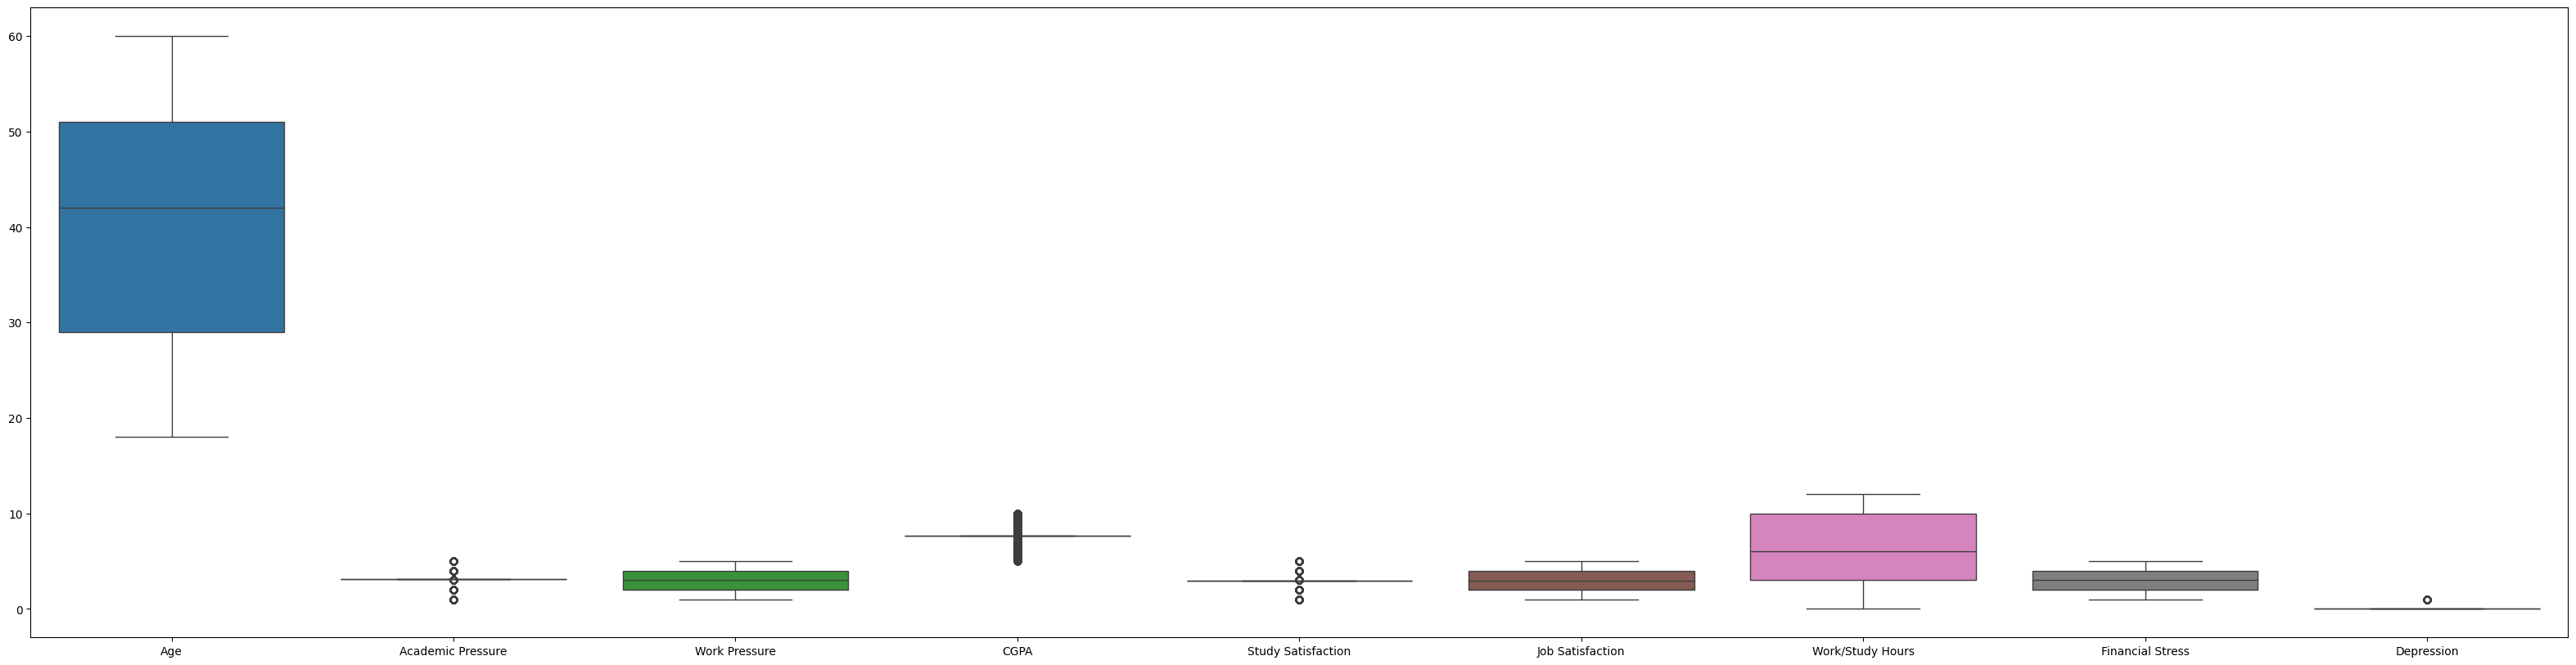

In [ ]:
plt.figure(figsize=(40, 10))
sns.boxplot(df)

In [ ]:
df

,Gender,Age,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Female,49.0,Working Professional,Chef,3.142273,5.000000,7.658636,2.94494,2.000000,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,Male,26.0,Working Professional,Teacher,3.142273,4.000000,7.658636,2.94494,3.000000,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,Male,33.0,Student,Student,5.000000,2.998998,8.970000,2.00000,2.974404,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,Male,22.0,Working Professional,Teacher,3.142273,5.000000,7.658636,2.94494,1.000000,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,Female,30.0,Working Professional,Business Analyst,3.142273,1.000000,7.658636,2.94494,1.000000,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140695,Female,18.0,Working Professional,Unknown,3.142273,5.000000,7.658636,2.94494,4.000000,5-6 hours,Unhealthy,Class 12,No,2.0,4.0,Yes,1
140696,Female,41.0,Working Professional,Content Writer,3.142273,5.000000,7.658636,2.94494,4.000000,7-8 hours,Moderate,B.Tech,Yes,6.0,5.0,Yes,0
140697,Female,24.0,Working Professional,Marketing Manager,3.142273,3.000000,7.658636,2.94494,1.000000,More than 8 hours,Moderate,B.Com,No,4.0,4.0,No,0
140698,Female,49.0,Working Professional,Plumber,3.142273,5.000000,7.658636,2.94494,2.000000,5-6 hours,Moderate,ME,Yes,10.0,1.0,No,0


In [ ]:
upper_limit=df['Academic Pressure'].mean()+3*df['Academic Pressure'].std()
lower_limit=df['Academic Pressure'].mean()-3*df['Academic Pressure'].std()
print('upper_limit:',upper_limit)
print('lower_limit:',lower_limit)

upper_limit: 4.986309936699218
lower_limit: 1.2982367887551307


In [ ]:
new_df=df.copy()
new_df.loc[(new_df['Academic Pressure']>=upper_limit), 'Academic Pressure']=upper_limit
new_df.loc[(new_df['Academic Pressure']<=lower_limit), 'Academic Pressure']=lower_limit

In [ ]:
df

,Gender,Age,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Female,49.0,Working Professional,Chef,3.142273,5.000000,7.658636,2.94494,2.000000,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,Male,26.0,Working Professional,Teacher,3.142273,4.000000,7.658636,2.94494,3.000000,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,Male,33.0,Student,Student,5.000000,2.998998,8.970000,2.00000,2.974404,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,Male,22.0,Working Professional,Teacher,3.142273,5.000000,7.658636,2.94494,1.000000,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,Female,30.0,Working Professional,Business Analyst,3.142273,1.000000,7.658636,2.94494,1.000000,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140695,Female,18.0,Working Professional,Unknown,3.142273,5.000000,7.658636,2.94494,4.000000,5-6 hours,Unhealthy,Class 12,No,2.0,4.0,Yes,1
140696,Female,41.0,Working Professional,Content Writer,3.142273,5.000000,7.658636,2.94494,4.000000,7-8 hours,Moderate,B.Tech,Yes,6.0,5.0,Yes,0
140697,Female,24.0,Working Professional,Marketing Manager,3.142273,3.000000,7.658636,2.94494,1.000000,More than 8 hours,Moderate,B.Com,No,4.0,4.0,No,0
140698,Female,49.0,Working Professional,Plumber,3.142273,5.000000,7.658636,2.94494,2.000000,5-6 hours,Moderate,ME,Yes,10.0,1.0,No,0


In [ ]:
df.value_counts('Depression')

,count
Depression,
0,115133
1,25567


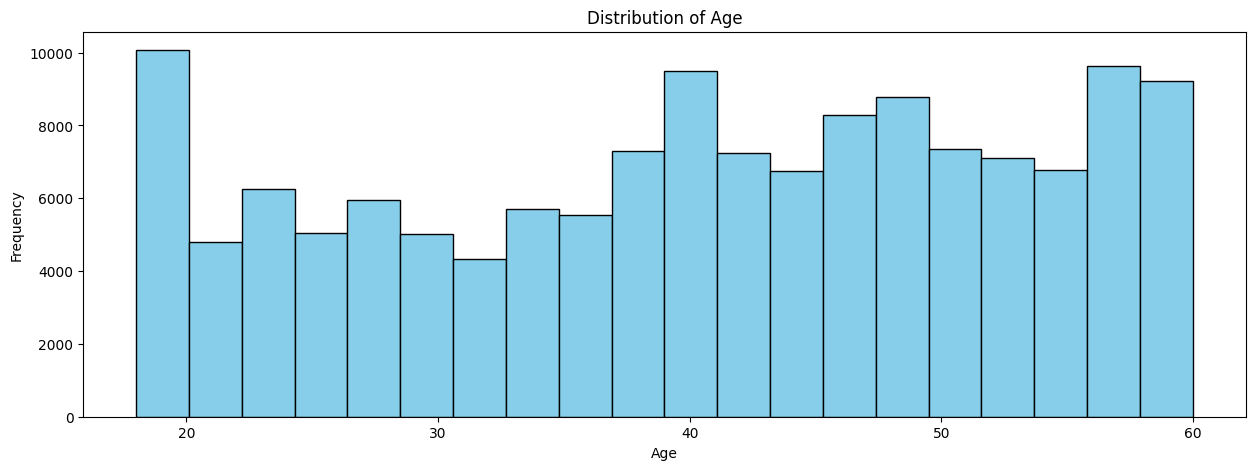

In [ ]:
# 1. Histogram for 'Age'
plt.figure(figsize=(15, 5))
plt.hist(df['Age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

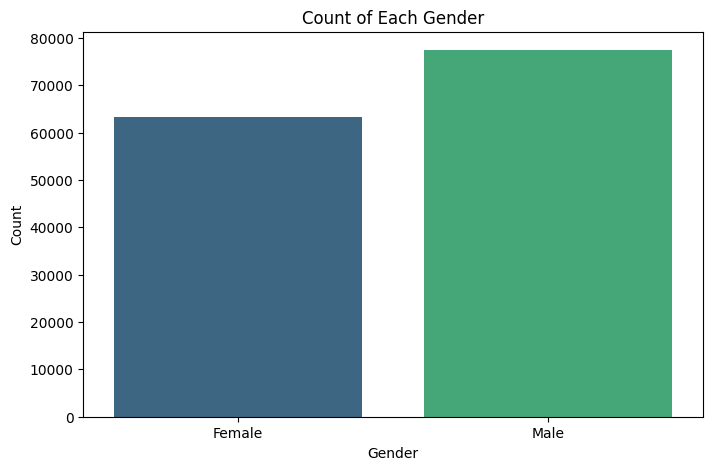

In [ ]:
# 2. Bar chart for 'Gender'
plt.figure(figsize=(8, 5))
sns.countplot(x='Gender', data=df, palette='viridis')
plt.title('Count of Each Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

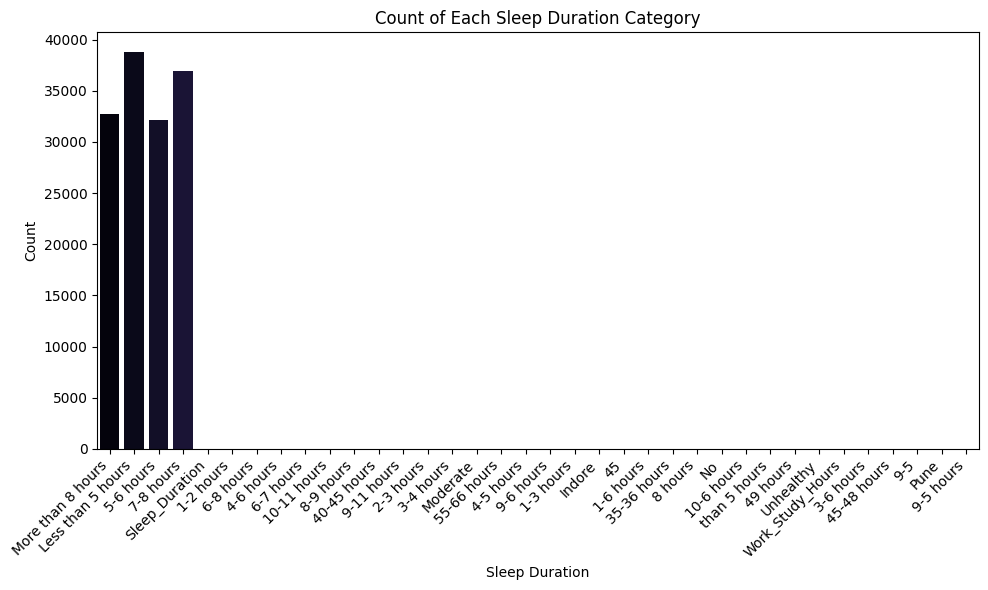

In [ ]:
# 3. Bar chart for 'Sleep Duration'
plt.figure(figsize=(10, 6))
sns.countplot(x='Sleep Duration', data=df, palette='magma')
plt.title('Count of Each Sleep Duration Category')
plt.xlabel('Sleep Duration')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

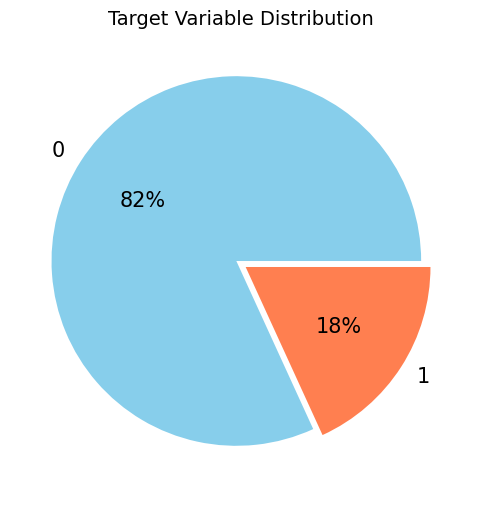

In [ ]:
plt.figure(figsize=(6, 6))
target_colors = ['skyblue', 'coral']

plt.pie(
    df["Depression"].value_counts(),
    labels=df["Depression"].value_counts().index,
    textprops={"fontsize": 15, "color": "black"},
    colors=target_colors,
    autopct="%.0f%%",
    explode=[0.03, 0.03],
)
plt.title("Target Variable Distribution", fontsize=14)
plt.show()

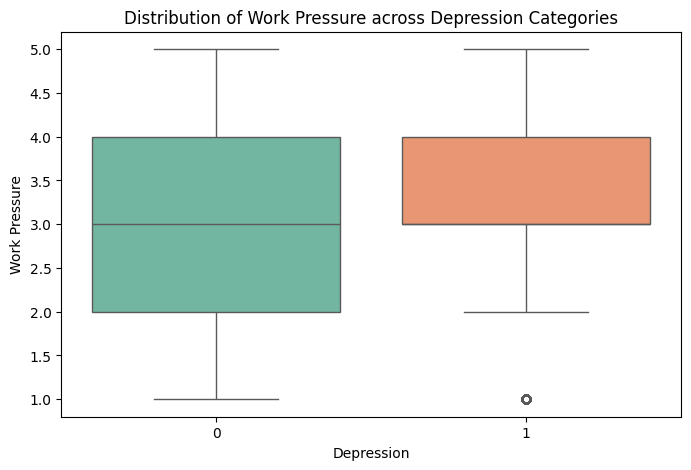

In [ ]:
# 4. Box plot for 'Work Pressure' across 'Depression'
plt.figure(figsize=(8, 5))
sns.boxplot(x='Depression', y='Work Pressure', data=df, palette='Set2')
plt.title('Distribution of Work Pressure across Depression Categories')
plt.xlabel('Depression')
plt.ylabel('Work Pressure')
plt.show()

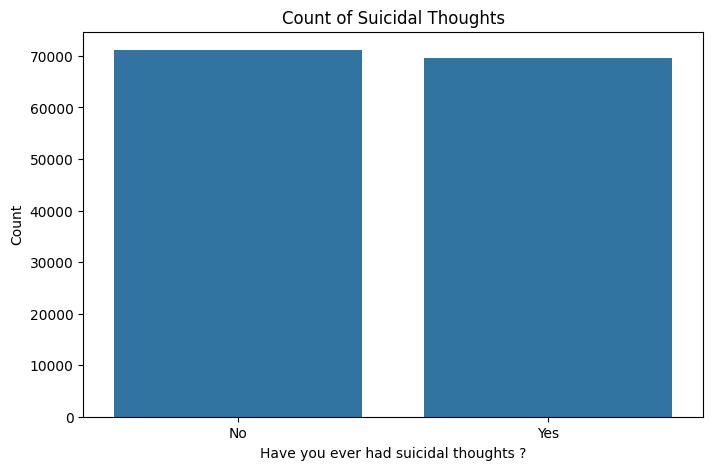

In [ ]:
# 8. Bar chart for 'Have you ever had suicidal thoughts ?'
plt.figure(figsize=(8, 5))
sns.countplot(x='Have you ever had suicidal thoughts ?', data=df)
plt.title('Count of Suicidal Thoughts')
plt.xlabel('Have you ever had suicidal thoughts ?')
plt.ylabel('Count')
plt.show()

In [ ]:
le_Gender=LabelEncoder()
le_Working_Professional_or_Student=LabelEncoder()
le_Profession=LabelEncoder()
le_Sleep_Duration=LabelEncoder()
le_Dietary_Habits=LabelEncoder()
le_Degree=LabelEncoder()
le_Have_you_ever_had_suicidal_thoughts=LabelEncoder()
le_Family_History_of_Mental_Illnes=LabelEncoder()

df['Gender']=le_Gender.fit_transform(df['Gender'])
df['Working Professional or Student']=le_Working_Professional_or_Student.fit_transform(df['Working Professional or Student'])
df['Profession']=le_Profession.fit_transform(df['Profession'])
df['Sleep Duration']=le_Sleep_Duration.fit_transform(df['Sleep Duration'])
df['Dietary Habits']=le_Dietary_Habits.fit_transform(df['Dietary Habits'])
df['Degree']=le_Degree.fit_transform(df['Degree'])
df['Have you ever had suicidal thoughts ?']=le_Have_you_ever_had_suicidal_thoughts.fit_transform(df['Have you ever had suicidal thoughts ?'])
df['Family History of Mental Illness']=le_Family_History_of_Mental_Illnes.fit_transform(df['Family History of Mental Illness'])

In [ ]:
df

,Gender,Age,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,49.0,1,10,3.142273,5.000000,7.658636,2.94494,2.000000,29,7,33,0,1.0,2.0,0,0
1,1,26.0,1,55,3.142273,4.000000,7.658636,2.94494,3.000000,27,20,63,1,7.0,3.0,0,1
2,1,33.0,0,54,5.000000,2.998998,8.970000,2.00000,2.974404,15,7,21,1,3.0,1.0,0,1
3,1,22.0,1,55,3.142273,5.000000,7.658636,2.94494,1.000000,27,15,28,1,10.0,1.0,1,1
4,0,30.0,1,9,3.142273,1.000000,7.658636,2.94494,1.000000,15,20,28,1,9.0,4.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140695,0,18.0,1,59,3.142273,5.000000,7.658636,2.94494,4.000000,15,20,45,0,2.0,4.0,1,1
140696,0,41.0,1,15,3.142273,5.000000,7.658636,2.94494,4.000000,19,15,24,1,6.0,5.0,1,0
140697,0,24.0,1,38,3.142273,3.000000,7.658636,2.94494,1.000000,29,15,19,0,4.0,4.0,0,0
140698,0,49.0,1,47,3.142273,5.000000,7.658636,2.94494,2.000000,15,15,84,1,10.0,1.0,0,0


In [ ]:
df.corr()

,Gender,Age,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
Gender,1.000000,-0.006890,-0.006657,0.011018,-9.867245e-03,-1.032708e-03,1.630534e-02,-7.103112e-03,-0.007012,0.001521,0.037833,0.011015,-0.010864,0.006957,-0.008022,-0.015499,0.008144
Age,-0.006890,1.000000,0.584984,-0.342105,-1.339589e-02,-7.829375e-02,9.046089e-04,1.562942e-03,0.024374,-0.022302,-0.067431,0.081566,-0.141502,-0.118356,-0.083587,0.009409,-0.564671
Working Professional or Student,-0.006657,0.584984,1.000000,-0.409838,3.736974e-05,-4.253125e-05,4.696733e-05,3.915436e-05,0.000067,-0.003877,-0.052431,0.026755,-0.137683,-0.116709,-0.053079,0.013070,-0.520790
Profession,0.011018,-0.342105,-0.409838,1.000000,-3.571759e-04,1.980330e-02,-5.721721e-05,-2.764077e-04,-0.008737,0.003857,0.047107,-0.005596,0.073102,0.059919,0.036745,-0.006968,0.277542
Academic Pressure,-0.009867,-0.013396,0.000037,-0.000357,1.000000e+00,1.008188e-16,-2.519032e-02,-1.122182e-01,-0.000008,0.001417,0.037506,-0.006914,0.112380,0.040976,0.068868,0.013347,0.270225
Work Pressure,-0.001033,-0.078294,-0.000043,0.019803,1.008188e-16,1.000000e+00,-3.290227e-16,4.823886e-17,-0.036954,-0.000789,0.016322,0.018037,0.043417,-0.002516,0.021726,-0.006499,0.137823
CGPA,0.016305,0.000905,0.000047,-0.000057,-2.519032e-02,-3.290227e-16,1.000000e+00,-4.707114e-02,-0.000014,-0.008998,0.000971,-0.007059,0.003677,0.001232,0.002898,-0.001858,0.012361
Study Satisfaction,-0.007103,0.001563,0.000039,-0.000276,-1.122182e-01,4.823886e-17,-4.707114e-02,1.000000e+00,-0.000019,0.000571,-0.009716,0.001286,-0.035794,-0.015821,-0.029423,-0.001774,-0.095577
Job Satisfaction,-0.007012,0.024374,0.000067,-0.008737,-7.655293e-06,-3.695419e-02,-1.448774e-05,-1.852099e-05,1.000000,0.001140,-0.023819,0.007608,-0.049418,-0.026186,-0.025953,-0.011307,-0.107254
Sleep Duration,0.001521,-0.022302,-0.003877,0.003857,1.416724e-03,-7.888897e-04,-8.998091e-03,5.714714e-04,0.001140,1.000000,-0.001038,0.003801,0.002578,-0.012450,0.004784,0.000102,0.014454


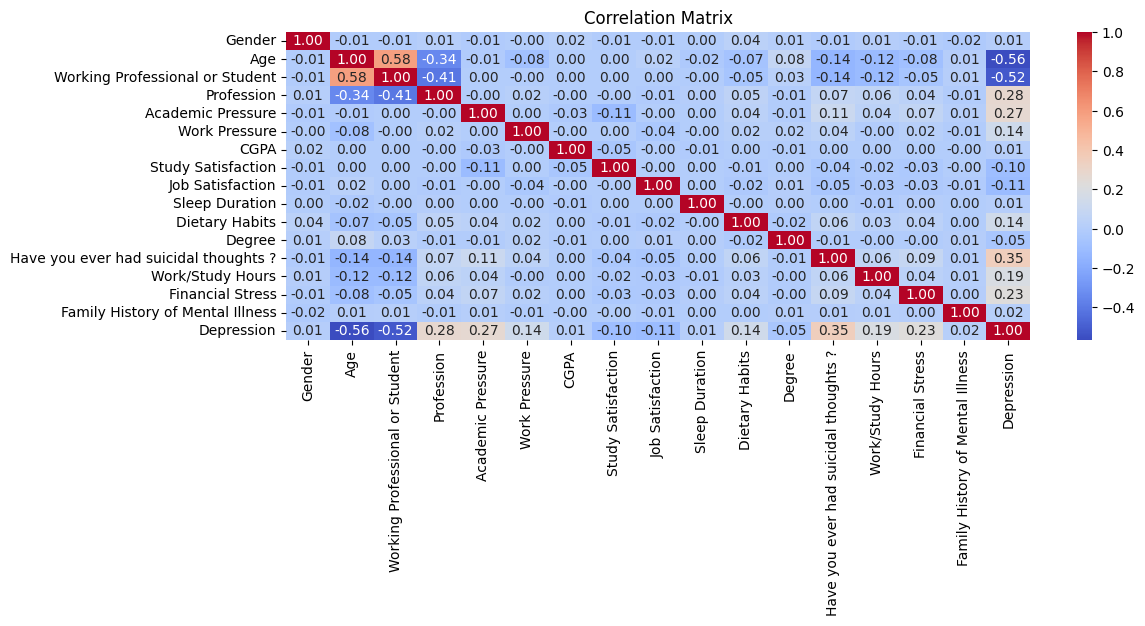

In [ ]:
# 6. Heatmap for correlation
plt.figure(figsize=(12, 4))
sns.heatmap(df.corr(),annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [ ]:
x = df.drop(columns=['Depression'])
y = df['Depression']

In [ ]:
scaler = StandardScaler()
xsc = scaler.fit_transform(x)
xsc

array([[-1.10679647,  0.69536016,  0.49734443, ..., -1.36305747,
        -0.69961657, -0.99421715],
       [ 0.90350849, -1.16186666,  0.49734443, ...,  0.19392785,
         0.00779329, -0.99421715],
       [ 0.90350849, -0.59662371, -2.01067899, ..., -0.84406236,
        -1.40702644, -0.99421715],
       ...,
       [-1.10679647, -1.32336465,  0.49734443, ..., -0.58456481,
         0.71520316, -0.99421715],
       [-1.10679647,  0.69536016,  0.49734443, ...,  0.97242051,
        -1.40702644, -0.99421715],
       [ 0.90350849, -1.08111767, -2.01067899, ..., -1.10355991,
         0.00779329,  1.00581649]])

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(xsc,y,test_size=0.2,random_state=0)

In [ ]:
models = {
    "KNN": KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2),
    "Logistic Regression": LogisticRegression(C=1.0, max_iter=100, solver='lbfgs'),
    "Decision Tree": DecisionTreeClassifier(max_depth=3, min_samples_split=2, criterion='gini'),
    "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=None, random_state=0, criterion='gini'),
    "Naive Bayes": GaussianNB(),
    "AdaBoost": AdaBoostClassifier(n_estimators=50, learning_rate=1.0),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3),
    "XGBoost": XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, objective="binary:logistic"),
}

Training Score: 0.945637882018479
Testing Score: 0.9276474769012082
KNN Accuracy: 0.9276
              precision    recall  f1-score   support

           0       0.95      0.96      0.96     23099
           1       0.81      0.78      0.79      5041

    accuracy                           0.93     28140
   macro avg       0.88      0.87      0.87     28140
weighted avg       0.93      0.93      0.93     28140

Training Score: 0.937322316986496
Testing Score: 0.937775408670931
Logistic Regression Accuracy: 0.9378
              precision    recall  f1-score   support

           0       0.96      0.97      0.96     23099
           1       0.84      0.81      0.82      5041

    accuracy                           0.94     28140
   macro avg       0.90      0.89      0.89     28140
weighted avg       0.94      0.94      0.94     28140

Training Score: 0.9143212508884151
Testing Score: 0.9129708599857853
Decision Tree Accuracy: 0.9130
              precision    recall  f1-score   support

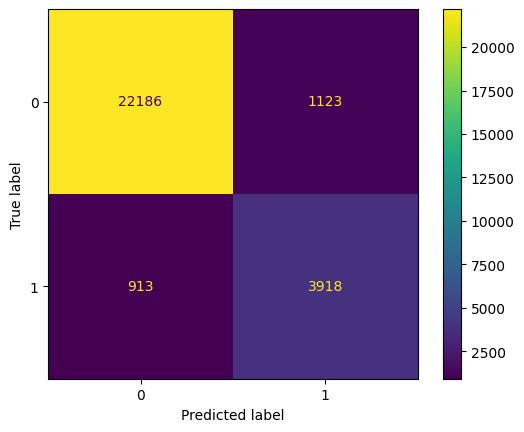

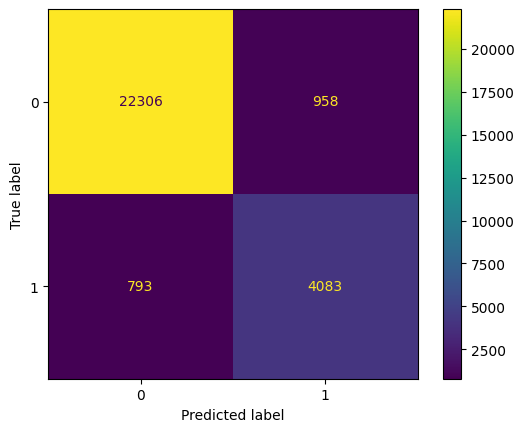

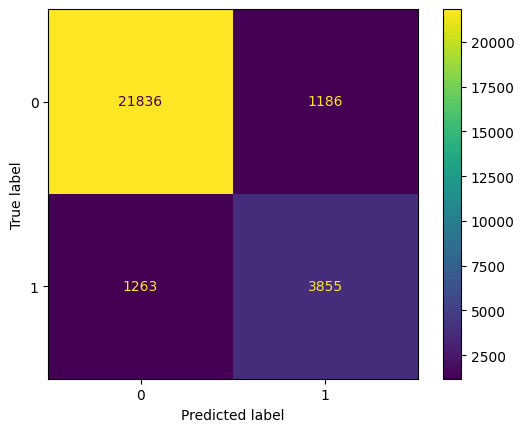

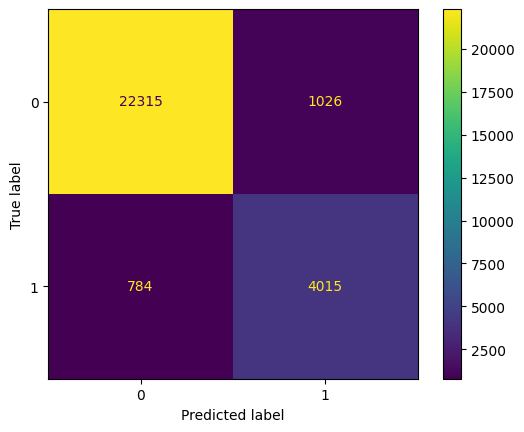

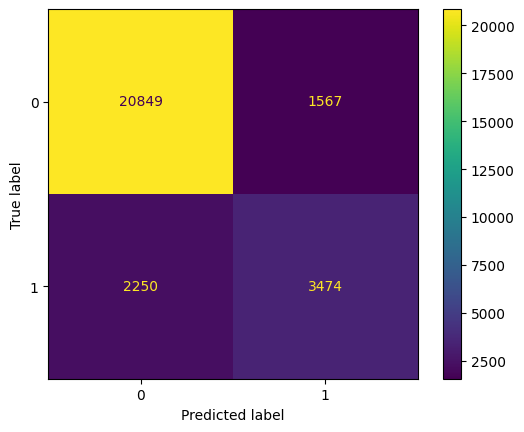

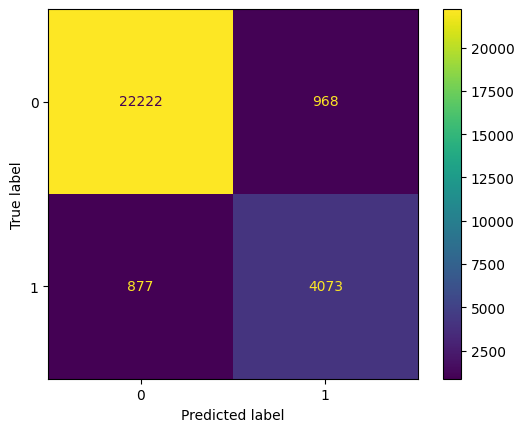

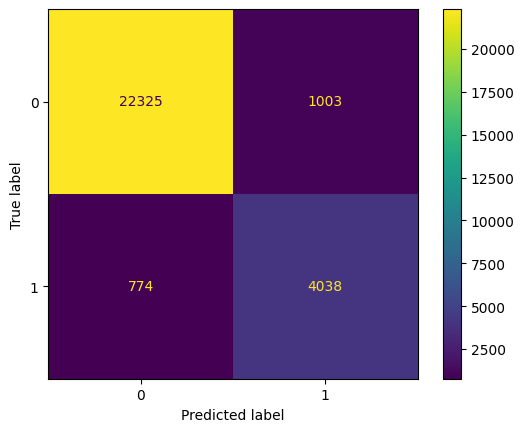

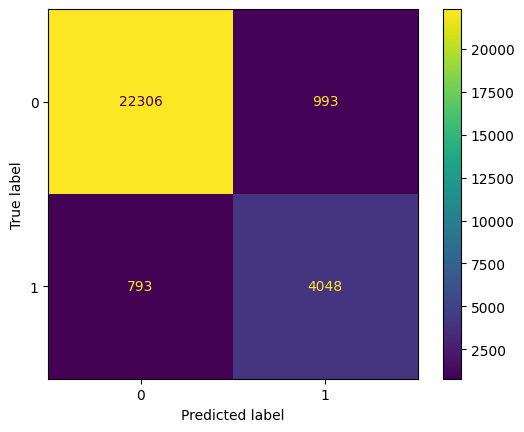

In [ ]:
for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    train_score = model.score(x_train, y_train)  # Training accuracy
    test_score = model.score(x_test, y_test)  # Testing accuracy

    print("Training Score:", train_score)
    print("Testing Score:", test_score)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {acc:.4f}") #The value is rounded to 4 decimal places.)
    print(classification_report(y_test, y_pred))
    print(ConfusionMatrixDisplay.from_predictions(y_pred,y_test))

In [ ]:
over=SMOTE(random_state=2)
x_os,y_os=over.fit_resample(xsc,y)

In [ ]:
y_os.value_counts()

,count
Depression,
0,115133
1,115133


Training Score: 0.9561376298189669
Testing Score: 0.940793283149971
KNN Accuracy: 0.9408
Model: KNN (SMOTE)
              precision    recall  f1-score   support

           0       0.98      0.90      0.94     34401
           1       0.91      0.98      0.94     34679

    accuracy                           0.94     69080
   macro avg       0.94      0.94      0.94     69080
weighted avg       0.94      0.94      0.94     69080

--------------------------------------------------
Training Score: 0.9255518469345972
Testing Score: 0.9259409380428488
Logistic Regression Accuracy: 0.9259
Model: Logistic Regression (SMOTE)
              precision    recall  f1-score   support

           0       0.93      0.92      0.93     34401
           1       0.92      0.93      0.93     34679

    accuracy                           0.93     69080
   macro avg       0.93      0.93      0.93     69080
weighted avg       0.93      0.93      0.93     69080

----------------------------------------------

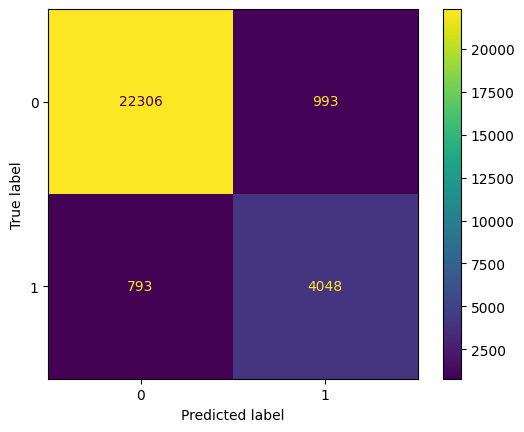

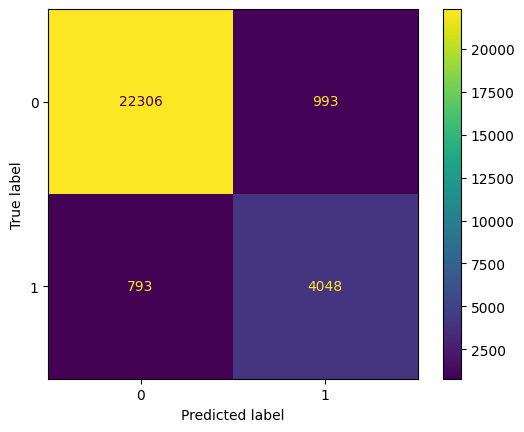

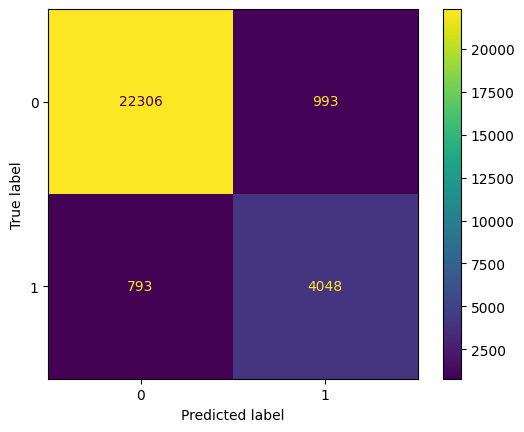

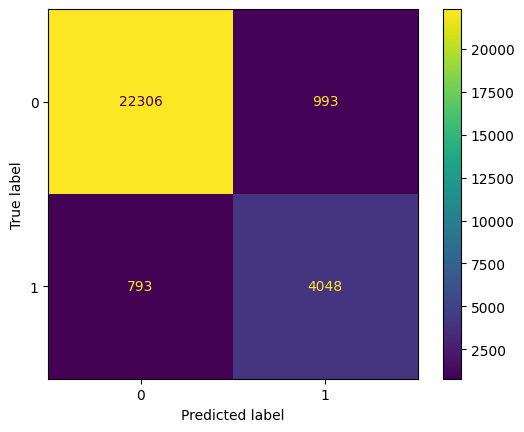

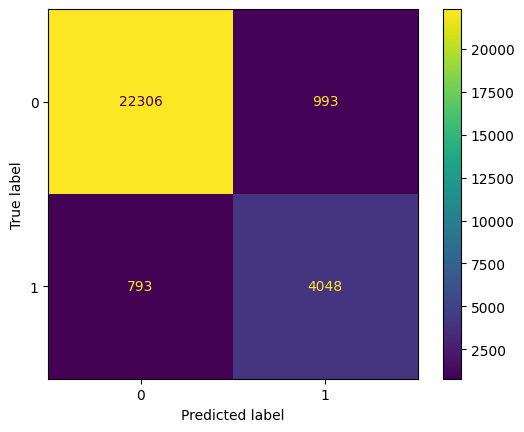

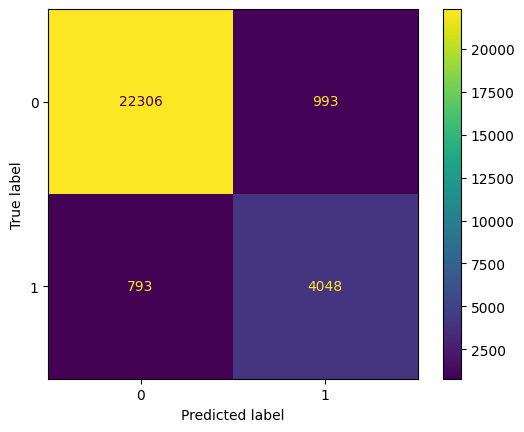

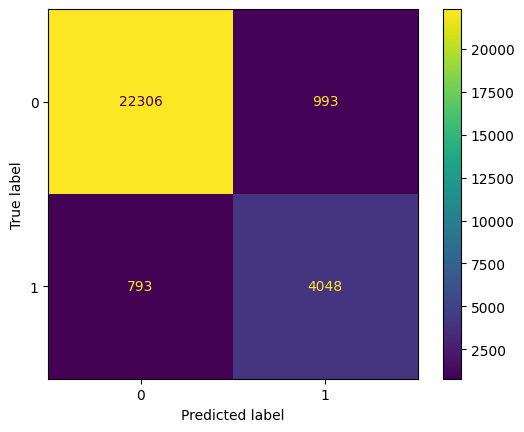

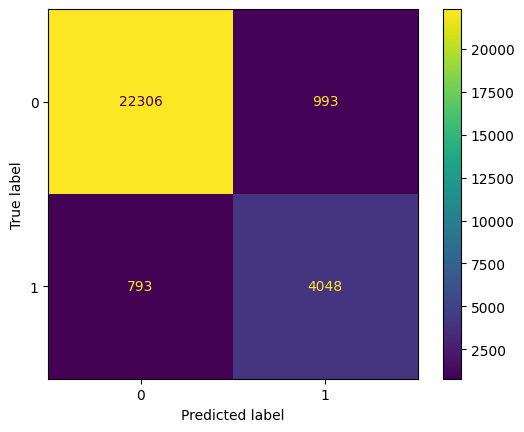

In [ ]:
x_trainos,x_testos,y_trainos,y_testos=train_test_split(x_os,y_os,test_size=0.3,random_state=42)
for name, model in models.items():
    model.fit(x_trainos,y_trainos)
    y_predos = model.predict(x_testos)
    train_score = model.score(x_trainos, y_trainos)  # Training accuracy
    test_score = model.score(x_testos, y_testos)  # Testing accuracy
    print("Training Score:", train_score)
    print("Testing Score:", test_score)
    acc = accuracy_score(y_testos, y_predos)
    print(f"{name} Accuracy: {acc:.4f}")
    print(f"Model: {name} (SMOTE)")
    print(classification_report(y_testos, y_predos))
    print(ConfusionMatrixDisplay.from_predictions(y_pred,y_test))
    print("-" * 50)

In [ ]:
# Perform cross-validation for each model
cv_results = {}

for name, model in models.items():
    scores = cross_val_score(model, x_trainos, y_trainos, cv=5)  # 5-fold cross-validation
    cv_results[name] = scores.mean()  # Store mean cross-validation score
    print(f"{name}: Mean CV Accuracy = {scores.mean():.4f}")

# Print the best model based on CV score
best_model = max(cv_results, key=cv_results.get)
print(f"\nBest Model Based on Cross-Validation: {best_model} with CV Accuracy = {cv_results[best_model]:.4f}")


KNN: Mean CV Accuracy = 0.9365
Logistic Regression: Mean CV Accuracy = 0.9255
Decision Tree: Mean CV Accuracy = 0.8970
Random Forest: Mean CV Accuracy = 0.9586
Naive Bayes: Mean CV Accuracy = 0.8282
AdaBoost: Mean CV Accuracy = 0.9367
Gradient Boosting: Mean CV Accuracy = 0.9516
XGBoost: Mean CV Accuracy = 0.9493

Best Model Based on Cross-Validation: Random Forest with CV Accuracy = 0.9586


In [ ]:
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}
rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(x_trainos, y_trainos)
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)
best_rf = grid_search.best_estimator_

# Evaluate on test data
test_accuracy = best_rf.score(x_testos, y_testos)
print("Final Test Accuracy:", test_accuracy)


Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Hyperparameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Accuracy: 0.9585509951622082
Final Test Accuracy: 0.9607411696583671


Accuracy Score 0.9607411696583671
              precision    recall  f1-score   support

           0       0.97      0.95      0.96     34401
           1       0.95      0.97      0.96     34679

    accuracy                           0.96     69080
   macro avg       0.96      0.96      0.96     69080
weighted avg       0.96      0.96      0.96     69080



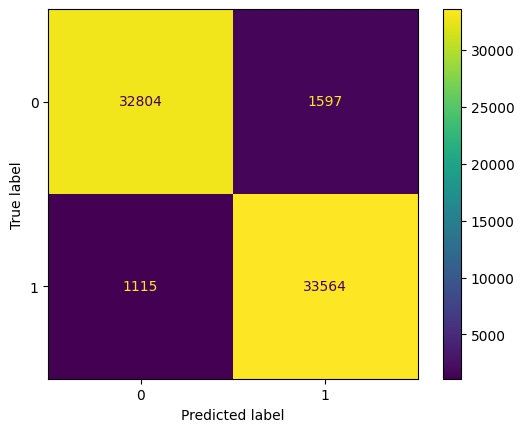

In [ ]:
y_pred = best_rf.predict(x_testos)
print("Accuracy Score",accuracy_score(y_testos,y_pred))
print(classification_report(y_testos, y_pred))
print(ConfusionMatrixDisplay.from_predictions(y_testos, y_pred))

In [ ]:
import joblib
joblib.dump(rf, r'C:\Users\noorn\MentalHealthPrediction.pkl')
joblib.dump(le_Gender, r'C:\Users\noorn\le_Gender.pkl')
joblib.dump(le_Working_Professional_or_Student,r'C:\Users\noorn\le_Working_Professional_or_Student.pkl')
joblib.dump(le_Profession, r'C:\Users\noorn\le_Profession.pkl')
joblib.dump(le_Sleep_Duration,r'C:\Users\noorn\le_Sleep_Duration.pkl')
joblib.dump(le_Dietary_Habits, r'C:\Users\noorn\le_Dietary_Habits.pkl')
joblib.dump(le_Degree,r'C:\Users\noorn\le_Degree.pkl')
joblib.dump(le_Have_you_ever_had_suicidal_thoughts, r'C:\Users\noorn\le_Have_you_ever_had_suicidal_thoughts.pkl')
joblib.dump(le_Family_History_of_Mental_Illnes, r'C:\Users\noorn\le_Family_History_of_Mental_Illnes.pkl')
joblib.dump(scaler,r'C:\Users\noorn\scaler.pkl')

['C:\\Users\\noorn\\scaler.pkl']